<a href="https://colab.research.google.com/github/a-proenca/LAD/blob/main/LAD_22_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instituto Politécnico de Coimbra
## Instituto Superior de Engenharia de Coimbra
## Mestrado em Engenharia Informática - Laboratório de Análise de Dados
## Elaborado por:

# André Proença - 2016018783

# Bruno Coutinho - 2014009997

#Imports

In [36]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#FUNCOES


In [21]:
def ler_emel():
    emel_filepath = '/content/drive/MyDrive/LAD_2023/EMEL'
    ficheiros = ['EMEL_CONDICIONAMENTOS_TRANSITO_2019.csv','EMEL_CONDICIONAMENTOS_TRANSITO_2020.csv','EMEL_CONDICIONAMENTOS_TRANSITO_2021.csv','EMEL_CONDICIONAMENTOS_TRANSITO_2022.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(emel_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result


In [22]:
def ler_eixos_vodafone_2021():
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/VODAFONE EIXOS/PGIL_VODAFONE_EIXOS_2021'
    ficheiros = ['PGIL_VODAFONE_EIXOS_2021_dez.csv','PGIL_VODAFONE_EIXOS_2021_nov.csv','PGIL_VODAFONE_EIXOS_2021_out.csv','PGIL_VODAFONE_EIXOS_2021_set.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

In [23]:
def ler_eixos_vodafone_2022():
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/VODAFONE EIXOS/PGIL_VODAFONE_EIXOS_2022'
    ficheiros = ['PGIL_VODAFONE_EIXOS_2022_01.csv','PGIL_VODAFONE_EIXOS_2022_02.csv','PGIL_VODAFONE_EIXOS_2022_03.csv','PGIL_VODAFONE_EIXOS_2022_04.csv','PGIL_VODAFONE_EIXOS_2022_05.csv','PGIL_VODAFONE_EIXOS_2022_06.csv','PGIL_VODAFONE_EIXOS_2022_07.csv','PGIL_VODAFONE_EIXOS_2022_08.csv','PGIL_VODAFONE_EIXOS_2022_09.csv','PGIL_VODAFONE_EIXOS_2022_10.csv','PGIL_VODAFONE_EIXOS_2022_11.csv','PGIL_VODAFONE_EIXOS_2022_12.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

In [24]:
def ler_eixos_vodafone_2023():
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/VODAFONE EIXOS/PGIL_VODAFONE_EIXOS_2023'
    ficheiros = ['PgilVodafone_Eixos_012023.csv','PgilVodafone_Eixos_022023.csv','PgilVodafone_Eixos_032023.csv','PgilVodafone_Eixos_042023.csv','PGILVodafonEixos_052023.csv','PGILVodafonEixos_062023.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

In [25]:
def ler_quadriculas_vodafone_bruto():
    vodafone_filepath = '/content/drive/MyDrive/LAD_2023/VODAFONE_QUADRICULAS'
    ficheiros = ['VODAFONE_QUADRICULAS_BRUTO.csv']

    data_frames = []  # Initialize as an empty list

    for ficheiro in ficheiros:
        path = os.path.join(vodafone_filepath, ficheiro)

        try:
            data_frame = pd.read_csv(path)
            data_frames.append(data_frame)

        except FileNotFoundError:
            print(f"Arquivo {ficheiro} não encontrado.")

    result = pd.concat(data_frames, ignore_index=True)

    return result

In [26]:
def plot_outlier_detection(df, column_name):

    # boxplot
    plt.figure(figsize=(10, 6))
    df.boxplot(column=[column_name])
    plt.title(f'Boxplot para Detecção de Outliers em {column_name}')
    plt.ylabel('Valores')
    plt.show()

    # scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df.index, df[column_name])
    plt.title(f'Scatter Plot para Detecção de Outliers em {column_name}')
    plt.xlabel('Índice')
    plt.ylabel('Valores')

    # Calculando o limite superior e inferior para outliers (exemplo: 1.5*IQR)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    plt.hlines([limite_superior, limite_inferior], xmin=df.index.min(), xmax=df.index.max(), colors='r')
    plt.show()


In [47]:
def plot_histogram_with_count(df, x_column):
     # Hist
    sns.histplot(data=df, x=x_column, stat='count')
    plt.title(f'Histograma de Contagem para {x_column}')
    plt.xlabel(x_column)
    plt.ylabel('Contagem')
    plt.show()

In [28]:
data_frame_emel = ler_emel()
data_vodafone_eixos2021 = ler_eixos_vodafone_2021()
data_vodafone_eixos2022 = ler_eixos_vodafone_2022()
data_vodafone_eixos2023 = ler_eixos_vodafone_2023()
#data_quadriculas_vodafone_bruto = ler_quadriculas_vodafone_bruto()


In [ ]:
data_vodafone_eixos2023

,id_eixo_viario,Eixo,Datetime,C12,C13,extract_year_2,extract_month_3,extract_day_4
0,11.0,IC2 (Sacavém),1672531200000,3.200000,0.000000,NaN,NaN,NaN
1,3.0,A5,1672531500000,0.000000,0.000000,NaN,NaN,NaN
2,4.0,N117 (Cabos Ávila),1672531500000,4.690000,0.000000,NaN,NaN,NaN
3,5.0,IC19,1672531500000,0.000000,0.000000,NaN,NaN,NaN
4,1.0,Ponte 25 Abril,1672535700000,3.340000,3.340000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
523323,NaN,IC16,2023-06-30T22:55:00.000Z,269.200012,325.600006,2023.0,6.0,30.0
523324,NaN,A1,2023-06-30T22:55:00.000Z,358.750000,475.269989,2023.0,6.0,30.0
523325,NaN,Calçada de Carriche,2023-06-30T22:55:00.000Z,135.300003,192.979996,2023.0,6.0,30.0
523326,NaN,IC2 (Sacavém),2023-06-30T22:55:00.000Z,314.799988,378.480011,2023.0,6.0,30.0


In [ ]:
print("Shape of EMEL Data: ", data_frame_emel.shape)
print("Shape of Eixos 2021: ", data_vodafone_eixos2021.shape)
print("Shape of Eixos 2022: ", data_vodafone_eixos2022.shape)
print("Shape of Eixos 2023: ", data_vodafone_eixos2023.shape)

Shape of EMEL Data:  (59049, 10)
Shape of Eixos 2021:  (326270, 7)
Shape of Eixos 2022:  (443399, 8)
Shape of Eixos 2023:  (523328, 8)


In [ ]:
print("Features of EMEL Data: \n", data_frame_emel.columns)
print("Features of Eixos 2021: \n", data_vodafone_eixos2021.columns)
print("Features of Eixos 2022: \n", data_vodafone_eixos2022.columns)
print("Features of Eixos 2023: \n", data_vodafone_eixos2023.columns)

Features of EMEL Data: 
 Index(['entity_id', 'impacto', 'restricao_circulacao', 'morada',
       'periodos_condicionamentos', 'motivo', 'position', 'creation_date',
       'startperiodo', 'endperiodo'],
      dtype='object')
Features of Eixos 2021: 
 Index(['Eixo', 'Datetime', 'extract_year_2', 'extract_month_3',
       'extract_day_4', 'C12', 'C13'],
      dtype='object')
Features of Eixos 2022: 
 Index(['Eixo', 'Datetime', 'extract_year_2', 'extract_month_3',
       'extract_day_4', 'C12', 'C13', 'id_eixo_viario'],
      dtype='object')
Features of Eixos 2023: 
 Index(['id_eixo_viario', 'Eixo', 'Datetime', 'C12', 'C13', 'extract_year_2',
       'extract_month_3', 'extract_day_4'],
      dtype='object')


In [ ]:
print("Features With null values of EMEL Data: \n", data_frame_emel.isnull().sum())

Features With null values of EMEL Data: 
 entity_id                    0
impacto                      1
restricao_circulacao         1
morada                       0
periodos_condicionamentos    0
motivo                       1
position                     0
creation_date                0
startperiodo                 0
endperiodo                   0
dtype: int64


In [ ]:
print("Features With null values of Eixos 2021: \n", data_vodafone_eixos2021.isnull().sum())

Features With null values of Eixos 2021: 
 Eixo               0
Datetime           0
extract_year_2     0
extract_month_3    0
extract_day_4      0
C12                0
C13                0
dtype: int64


In [ ]:
print("Features With null values of Eixos 2022: \n", data_vodafone_eixos2022.isnull().sum())

Features With null values of Eixos 2022: 
 Eixo                    0
Datetime                0
extract_year_2     283706
extract_month_3    283706
extract_day_4      283706
C12                     0
C13                     0
id_eixo_viario     159693
dtype: int64


In [ ]:
print("Features With null values of Eixos 2023: \n", data_vodafone_eixos2023.isnull().sum())

Features With null values of Eixos 2023: 
 id_eixo_viario     184264
Eixo                    0
Datetime                0
C12                     0
C13                     0
extract_year_2     339064
extract_month_3    339064
extract_day_4      339064
dtype: int64


In [30]:
data_vodafone_eixos2021.describe()

,extract_year_2,extract_month_3,extract_day_4,C12,C13
count,326270.0,326270.000000,326270.000000,326270.000000,326270.000000
mean,2021.0,10.674055,16.908346,191.877081,187.496946
std,0.0,1.070438,8.787934,214.232482,205.478765
min,2021.0,9.000000,1.000000,0.000000,0.000000
25%,2021.0,10.000000,10.000000,39.840000,41.099998
50%,2021.0,11.000000,17.000000,125.570000,125.309998
75%,2021.0,12.000000,25.000000,266.790009,262.559998
max,2021.0,12.000000,31.000000,10270.719727,10204.879883


In [31]:
data_vodafone_eixos2022.describe()

,extract_year_2,extract_month_3,extract_day_4,C12,C13,id_eixo_viario
count,159693.0,159693.000000,159693.000000,443399.000000,443399.000000,283706.000000
mean,2022.0,1.650317,16.804719,109.663219,106.987639,5.999989
std,0.0,0.869172,9.548684,126.512655,119.642309,3.162297
min,2022.0,1.000000,1.000000,0.000000,0.000000,1.000000
25%,2022.0,1.000000,7.000000,23.650000,24.200001,3.000000
50%,2022.0,1.000000,19.000000,69.870003,69.970001,6.000000
75%,2022.0,3.000000,25.000000,150.495003,149.240005,9.000000
max,2022.0,3.000000,31.000000,5306.410156,5151.669922,11.000000


In [32]:
data_vodafone_eixos2023.describe()

,id_eixo_viario,C12,C13,extract_year_2,extract_month_3,extract_day_4
count,339064.000000,523328.000000,523328.000000,184264.0,184264.000000,184264.000000
mean,6.000000,301.511314,299.440974,2023.0,5.481174,15.474444
std,3.162282,223.924274,215.448610,0.0,0.501078,8.798968
min,1.000000,0.000000,0.000000,2023.0,4.000000,1.000000
25%,3.000000,125.140000,130.020000,2023.0,5.000000,8.000000
50%,6.000000,251.020004,256.180000,2023.0,5.000000,15.000000
75%,9.000000,450.400000,438.930000,2023.0,6.000000,23.000000
max,11.000000,7497.279785,7587.879883,2023.0,6.000000,31.000000


In [ ]:
plot_outlier_detection(data_vodafone_eixos2023, 'C13')

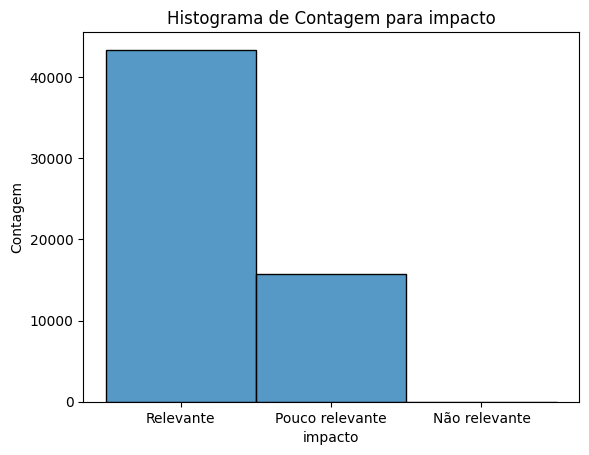

In [48]:
plot_histogram_with_count(data_frame_emel, 'impacto')
